In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Configuración de estilo para los gráficos
plt.style.use('default')

In [3]:
# Datos proporcionados
datos = {
    "Materia Prima": {
        "Compra de MP": 854900,
        "Inventario Inicial MP": 100000,
        "Inventario Final MP": 125000
    },
    "Mano de Obra Directa": {
        "MOD": 750000
    },
    "Costos Indirectos de Fabricación": {
        "MOI": 100000,
        "Depreciación equipos": 100000,
        "Mantenimiento equipos": 100000,
        "Horas extras indirectas producción": 50000,
        "Energía eléctrica": 25000,
        "Alquiler edificio fábrica": 126750,
        "Seguro equipos": 16250,
        "Abrasivos": 5000,
        "Combustibles": 12000
    },
    "Gastos No Fabriles": {
        "Gastos envío a sucursal": 175000,
        "Comisiones ventas": 150000,
        "Sueldos personal ventas": 250000,
        "Gastos administrativos": 250000
    },
    "Producción y Ventas": {
        "Producción (unidades)": 9750,
        "Ventas (unidades)": 6420,
        "Ventas ($)": 3000000
    }
}

In [4]:
# Cálculos
# Materia Prima utilizada
mp_utilizada = datos["Materia Prima"]["Compra de MP"] + datos["Materia Prima"]["Inventario Inicial MP"] - datos["Materia Prima"]["Inventario Final MP"]

# Costo Primo
costo_primo = mp_utilizada + datos["Mano de Obra Directa"]["MOD"]

# CIF Total
cif_total = sum(datos["Costos Indirectos de Fabricación"].values())

# Costo de Conversión
costo_conversion = datos["Mano de Obra Directa"]["MOD"] + cif_total

# Costo de Producción Total
costo_produccion = costo_primo + cif_total

# Costo Unitario
costo_unitario = costo_produccion / datos["Producción y Ventas"]["Producción (unidades)"]

# Costo de Ventas
costo_ventas = costo_unitario * datos["Producción y Ventas"]["Ventas (unidades)"]

# Gastos de distribución y administración
gastos_distribucion_administracion = sum(datos["Gastos No Fabriles"].values())

# Resultado del Período
resultado_periodo = datos["Producción y Ventas"]["Ventas ($)"] - costo_ventas - gastos_distribucion_administracion

In [5]:
# Crear DataFrames para mostrar los datos
df_mp = pd.DataFrame(list(datos["Materia Prima"].items()), columns=['Concepto', 'Monto'])
df_mod = pd.DataFrame(list(datos["Mano de Obra Directa"].items()), columns=['Concepto', 'Monto'])
df_cif = pd.DataFrame(list(datos["Costos Indirectos de Fabricación"].items()), columns=['Concepto', 'Monto'])
df_gastos = pd.DataFrame(list(datos["Gastos No Fabriles"].items()), columns=['Concepto', 'Monto'])

In [6]:
# Crear DataFrame con los resultados
resultados = {
    'Concepto': [
        'Materia Prima Utilizada',
        'Costo Primo',
        'Costo de Conversión',
        'Costo de Producción Total',
        'Costo Unitario',
        'Costo de Ventas',
        'Resultado del Período'
    ],
    'Monto': [
        mp_utilizada,
        costo_primo,
        costo_conversion,
        costo_produccion,
        costo_unitario,
        costo_ventas,
        resultado_periodo
    ]
}

df_resultados = pd.DataFrame(resultados)


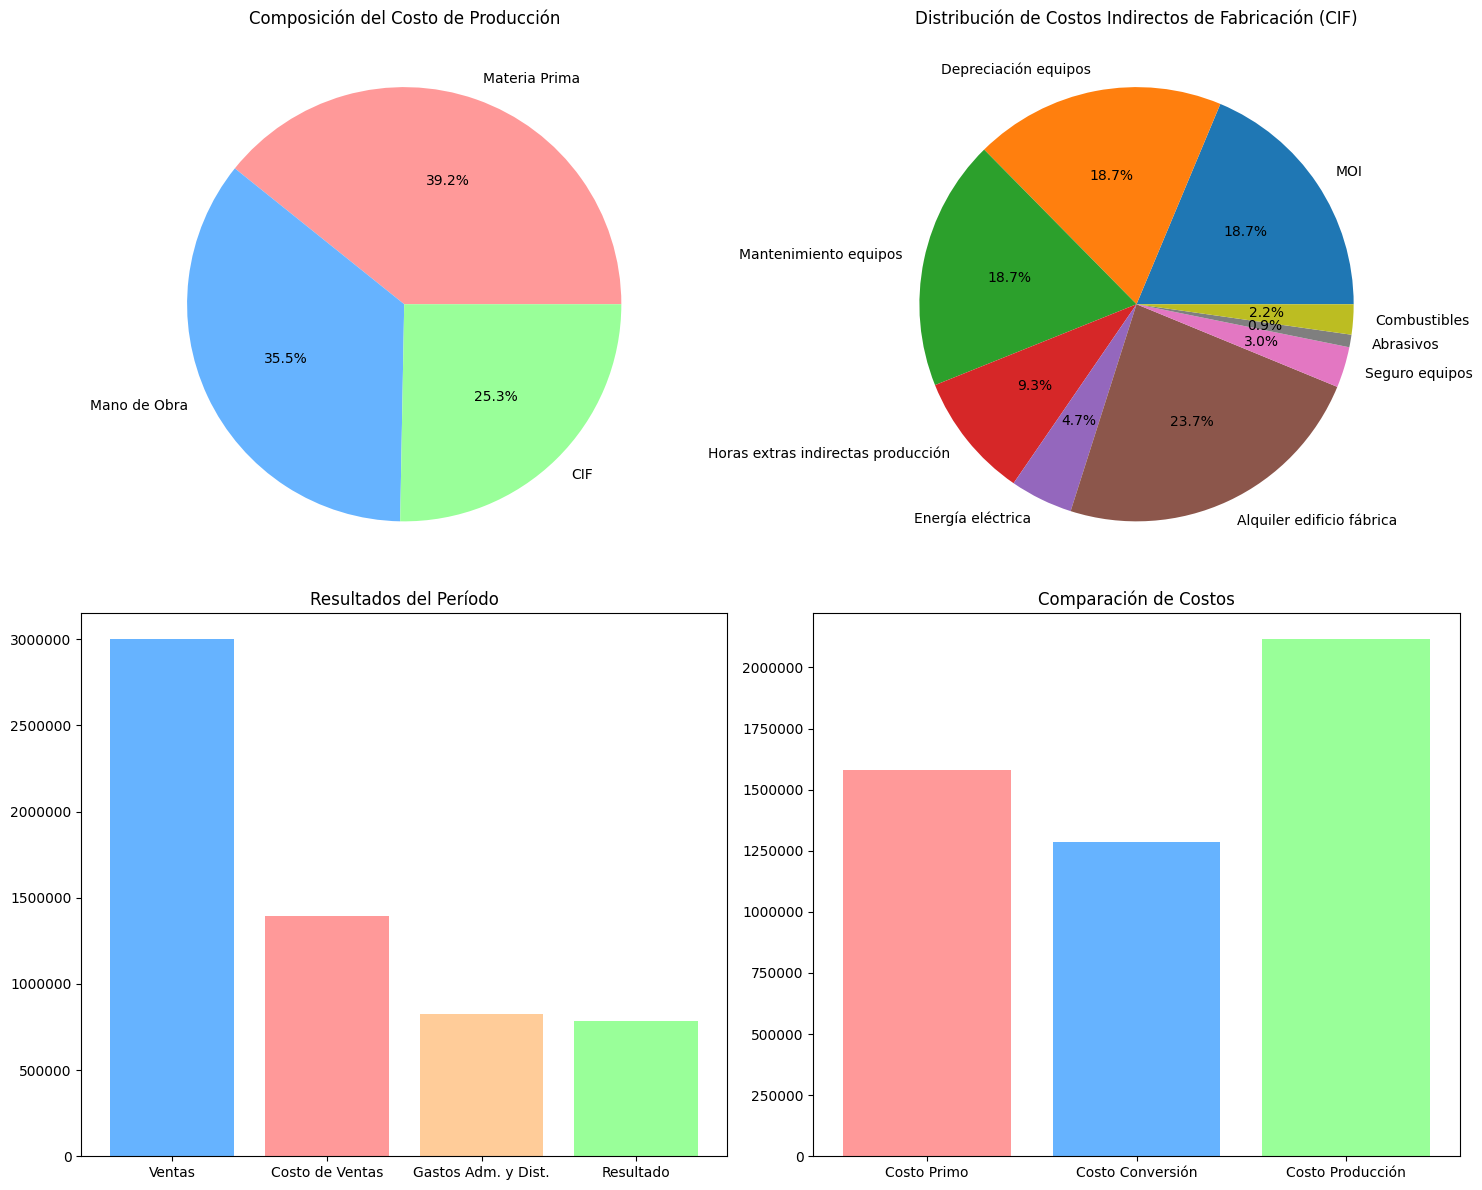

In [7]:
# Crear gráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Composición del Costo de Producción
componentes_produccion = ['Materia Prima', 'Mano de Obra', 'CIF']
valores_produccion = [mp_utilizada, datos["Mano de Obra Directa"]["MOD"], cif_total]
colors = ['#ff9999', '#66b3ff', '#99ff99']
ax1.pie(valores_produccion, labels=componentes_produccion, autopct='%1.1f%%', colors=colors)
ax1.set_title('Composición del Costo de Producción')

# Gráfico 2: Distribución de CIF
conceptos_cif = list(datos["Costos Indirectos de Fabricación"].keys())
valores_cif = list(datos["Costos Indirectos de Fabricación"].values())
ax2.pie(valores_cif, labels=conceptos_cif, autopct='%1.1f%%')
ax2.set_title('Distribución de Costos Indirectos de Fabricación (CIF)')

# Gráfico 3: Resultados del Período
conceptos_resultados = ['Ventas', 'Costo de Ventas', 'Gastos Adm. y Dist.', 'Resultado']
valores_resultados = [
    datos["Producción y Ventas"]["Ventas ($)"],
    costo_ventas,
    gastos_distribucion_administracion,
    resultado_periodo
]
colors_resultados = ['#66b3ff', '#ff9999', '#ffcc99', '#99ff99']
ax3.bar(conceptos_resultados, valores_resultados, color=colors_resultados)
ax3.set_title('Resultados del Período')
ax3.ticklabel_format(style='plain', axis='y')

# Gráfico 4: Comparación de Costos
costos_comparacion = ['Costo Primo', 'Costo Conversión', 'Costo Producción']
valores_comparacion = [costo_primo, costo_conversion, costo_produccion]
ax4.bar(costos_comparacion, valores_comparacion, color=['#ff9999', '#66b3ff', '#99ff99'])
ax4.set_title('Comparación de Costos')
ax4.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig('graficos_actividad_5.png')
plt.show()


In [9]:
# Mostrar resultados en consola
print("=" * 50)
print("ACTIVIDAD N° 5 - RESULTADOS")
print("=" * 50)
print(f"Materia Prima utilizada: ${mp_utilizada:,.2f}")
print(f"Costo Primo: ${costo_primo:,.2f}")
print(f"Costo de Conversión: ${costo_conversion:,.2f}")
print(f"Costo de Producción: ${costo_produccion:,.2f}")
print(f"Costo Unitario: ${costo_unitario:,.2f}")
print(f"Costo de Ventas: ${costo_ventas:,.2f}")
print(f"Resultado del Período: ${resultado_periodo:,.2f}")
print("=" * 50)

ACTIVIDAD N° 5 - RESULTADOS
Materia Prima utilizada: $829,900.00
Costo Primo: $1,579,900.00
Costo de Conversión: $1,285,000.00
Costo de Producción: $2,114,900.00
Costo Unitario: $216.91
Costo de Ventas: $1,392,580.31
Resultado del Período: $782,419.69


In [ ]:
# Exportar a Excel
with pd.ExcelWriter('resultados_actividad_5.xlsx') as writer:
    df_mp.to_excel(writer, sheet_name='Detalle_MP', index=False)
    df_mod.to_excel(writer, sheet_name='Detalle_MOD', index=False)
    df_cif.to_excel(writer, sheet_name='Detalle_CIF', index=False)
    df_gastos.to_excel(writer, sheet_name='Gastos_No_Fabriles', index=False)
    df_resultados.to_excel(writer, sheet_name='Resumen_Resultados', index=False)